This notebook gets lyrics using the GeniusLyrics package and does some initial exploration. We're starting with Slayer. 

## Import packages

In [13]:
import lyricsgenius as genius
import json
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
#from textblob import TextBlob

## Get all the lyrics 

...and write them to a .json file

In [108]:
api_key = 'Nc3VjqRNlEZiD9mqOQATDQ5PuZ4IjdgV13n7c39OIyNwsjuazZThQlQkdr_Hts4c'
api = genius.Genius(api_key)
api.remove_section_headers = True # Removes section headers like "Verse" and "Intro"
api.excluded_terms = ["(Remix)", "(Live)", "(Jeff)", "(Orchestral Version)", "(Film Transcript)"] # Exclude songs with these words in their title
api.skip_non_songs = True # Exclude hits thought to be non-songs (e.g. track lists)

artist = api.search_artist('Black Crown Initiate')

lyrics = artist.save_lyrics()


Searching for songs by Black Crown Initiate...

Song 1: "Selves We Cannot Forgive"
Song 2: "A Great Mistake"
Song 3: "Withering Waves"
Song 4: "Belie The Machine"
Song 5: "For Red Cloud"
Song 6: "Stench of the Iron Age"
Song 7: "Years in Frigid Light"
Song 8: "Matriarch"
Song 9: "Transmit To Disconnect"
"Vicious Lives" is not valid. Skipping.
Song 10: "Sorrowpsalm"
Song 11: "Again"
Song 12: "Song of the Crippled Bull"
Song 13: "The Wreckage Of Stars"
Song 14: "Purge"
Song 15: "The Mountain Top"
Song 16: "The Human Lie Manifest"
Song 17: "The Malignant"
Song 18: "The Fractured One"
Song 19: "Ghosts She Sends"
Song 20: "Linear"
Song 21: "Shape’s Collapse"
Song 22: "To The Eye That Leads You"
Song 23: "Sun of War"
Song 24: "Invitation"
Song 25: "He Is the Path"
Song 26: "Bellow"
Song 27: "Holy Silence"
Song 28: "Trauma Bonds"
Song 29: "Death Comes in Reverse"
Song 30: "Son of War"
Done. Found 30 songs.
Wrote `Lyrics_BlackCrownInitiate.json`


In [77]:
lyrics = artist.save_lyrics()

Lyrics_Metallica.json already exists. Overwrite?
(y/n): y
Wrote `Lyrics_Metallica.json`


## Create Lyrics DataFrame

In [109]:
with open("Lyrics_BlackCrownInitiate.json") as f:
    data = json.load(f)

df = pd.DataFrame(data["songs"])[["title", "lyrics"]]
df.dropna(inplace=True)

df.head()

,title,lyrics
0,Selves We Cannot Forgive,Broken in all its beauty\nProcessed by pallid ...
1,A Great Mistake,"I, the burning arrow for the other shore\nAnd ..."
2,Withering Waves,The place where I have always been free has be...
3,Belie The Machine,A species was chosen to lie for\nA species was...
4,For Red Cloud,"Fearing\nEternal, internal\nDesperate human al..."


In [103]:
#Take a look at a song
df.at[171,'lyrics']

"They do their best, they do what they can\nThey get them ready for Vietnam\nFrom old Hanoi to East Berlin\nCommando... Involved again\nThey do their best, they do what they can\nThey get them ready for Vietnam\nFirst rule is - The laws of Germany\nSecond rule is - Be nice to mommy\nThird rule is - Don't talk to commies\nFourth rule is - Eat kosher salamis\nThey do their best, they do what they can\nThey get them ready for Vietnam\nFrom old Hanoi to East Berlin\nCommando... Involved again\nThey do their best, they do what they can\nThey get them ready for Vietnam\nFirst rule is - The laws of Germany\nSecond rule is - Be nice to mo-mo-mo-mommy\nThird rule is - Don't talk to commies\nFourth rule is - Eat kosher salamis"

In [110]:
df.shape

(30, 2)

In [111]:
#For Slayer only
#This song (111) is actually a story about the guitarist's death, so it needs to be taken out of the corpus. 
#df = df.drop([111])

In [112]:
#Remove all structure except for basic line structure
df["lyrics"] = (
    df["lyrics"]
    .apply(lambda x: x.lower())
     .apply(lambda x: x.replace("\\", " "))
     .apply(lambda x: x.replace("\\n", " "))
     .apply(lambda x: x.replace("(", ""))
     .apply(lambda x: x.replace(")", ""))
     .apply(lambda x: x.replace("\'", "'"))
     .apply(lambda x: x.replace("\n\n", "\n"))
     .apply(lambda x: x.replace("\n \n", "\n"))
     .apply(lambda x: x.replace("\n\n\n", "\n"))
     #.apply(lambda x: x.replace("\u205", ""))
     .apply(lambda x: x.replace("\u205f", ""))
     .apply(lambda x: x.replace("\u2005", ""))
)
df.head()

,title,lyrics
0,Selves We Cannot Forgive,broken in all its beauty\nprocessed by pallid ...
1,A Great Mistake,"i, the burning arrow for the other shore\nand ..."
2,Withering Waves,the place where i have always been free has be...
3,Belie The Machine,a species was chosen to lie for\na species was...
4,For Red Cloud,"fearing\neternal, internal\ndesperate human al..."


In [113]:
text = " ".join(df.lyrics)
len(text)

21259

In [114]:
text_file = open("metallica_corpus_final.txt", "w")
text_file.write(text)
text_file.close()



## Explore Data

In [115]:
# Define default stopwords list
stoplist = ENGLISH_STOP_WORDS

In [116]:
df_explore = df;

df_explore["lyrics"] = (
    df_explore["lyrics"]
    .apply(lambda x: x.lower())
    .apply(lambda x: x.replace("\\", " "))
    .apply(lambda x: x.replace("\\n", " "))
    .apply(lambda x: x.replace("\n", " "))
    .apply(lambda x: x.replace("'", ""))
    .apply(lambda x: x.replace("\n\n", "\n"))
    .apply(lambda x: x.replace("\n \n", "\n"))
    .apply(lambda x: x.replace("\n\n\n", "\n"))
)
df_explore.head()

,title,lyrics
0,Selves We Cannot Forgive,broken in all its beauty processed by pallid e...
1,A Great Mistake,"i, the burning arrow for the other shore and s..."
2,Withering Waves,the place where i have always been free has be...
3,Belie The Machine,a species was chosen to lie for a species was ...
4,For Red Cloud,"fearing eternal, internal desperate human aliv..."


In [117]:
def show_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stoplist, background_color="white", colormap="Blues").generate(text)

    # Display the generated image:
    fig = plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.title(f'Word Cloud for Bjork', fontsize=20)
    plt.axis("off")
    plt.show()

In [118]:
def get_wordcloud(df):
    # Get all texts and generate a cloud
    text = " ".join(review for review in df.lyrics)
    show_wordcloud(text) 

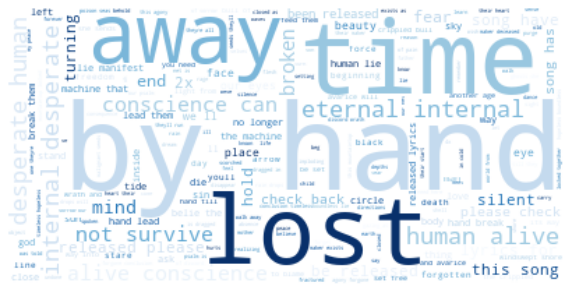

In [119]:
get_wordcloud(df)